In [4]:
import imageio
import cv2
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
vid = imageio.get_reader('/Users/kentchiu/MIT_Vedio/2016-01-21/10.167.10.158_01_20160121082638418_2.mp4')

/Users/kentchiu/Library/Application Support/imageio/ffmpeg/ffmpeg.osx
/Users/kentchiu/anaconda/lib/python2.7/site-packages/imageio/resources/ffmpeg/ffmpeg.osx


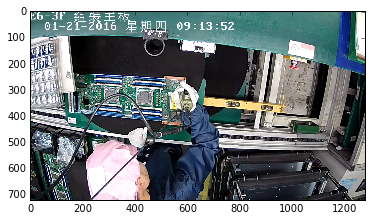

In [6]:
plt.imshow(vid.get_data(1))


In [1]:
# Functions
def neighbor_attention(imgInput,tarBox, attenScale=0.2):
    '''
    attenScale : would depend on the tarbox, default = 0.35
    output : propose of ROI and new_tarbox
    '''
    # Parser the tarBox
    startX, startY, endX, endY  = tarBox
    width = endX-startX
    height = endY-startY
    
    # enlarge the region for fast-match -> StartX, StartY
    startX = int(max(startX-attenScale*width,0))
    startY = int(max(startY-attenScale*height,0))
    
    maxY, maxX = imgInput.shape[0], imgInput.shape[1]
    
    # enlarge the region for fast-match -> endX, endY
    endX = int(min(endX+attenScale*width,maxX))
    endY = int(min(endY+attenScale*height, maxY))
    
    # enlarged tarBox
    tarBox = [startX, startY, endX, endY]
    roi = imgInput[tarBox[1]:tarBox[3],tarBox[0]:tarBox[2]]
    return roi, tarBox

def crop_tarBox(imgInput, tarBox):
    return imgInput[tarBox[1]:tarBox[3],tarBox[0]:tarBox[2]]

def have_refimg(imgInput,tarBox,channels ):
    if channels==3:
        # process RBG, HSC, data (3 channels)
        return imgInput[tarBox[1]:tarBox[3],tarBox[0]:tarBox[2],:]
    else :
        # process depth data or gray-scale data
        return imgInput[tarBox[1]:tarBox[3],tarBox[0]:tarBox[2]]

def template_match_gray(refImg, newImg):
    res = cv2.matchTemplate(newImg, refImg, cv2.TM_CCOEFF)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print  min_val, max_val, min_loc, max_loc
    
    top_left = max_loc
    h , w, = refImg.shape
    bottom_right = (top_left[0]+w,top_left[1]+h)
    
    print (top_left, bottom_right)
    cv2.rectangle(newImg, top_left, bottom_right, 255, 2)
    #show(newImg)
    #NewTemplate =newImg[top_left[1]:top_left[1]+h, top_left[0]:top_left[0]+w]
    return newImg, (top_left[0],top_left[1], bottom_right[0],bottom_right[1])

In [ ]:
neighbor_attention()